<a href="https://colab.research.google.com/github/katdask/Data_Science_Projects/blob/main/Unzip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!unzip -u "/content/drive/My Drive/facial_attributes/archive (1).zip" -d "/content/drive/My Drive/facial_attributes/data"

In [2]:
%cd /content/drive/My Drive/facial_attributes/

/content/drive/My Drive/facial_attributes


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Load and prepare data

In [4]:
celebs=pd.read_csv("list_attr_celeba.csv")
celebs.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [5]:
celebs["image_id"]='data/img_align_celeba/img_align_celeba/' + celebs["image_id"].astype(str)
celebs.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,data/img_align_celeba/img_align_celeba/000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1
1,data/img_align_celeba/img_align_celeba/000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,data/img_align_celeba/img_align_celeba/000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,data/img_align_celeba/img_align_celeba/000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,1
4,data/img_align_celeba/img_align_celeba/000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [6]:
celebs.replace(-1, 0, inplace=True)
celebs.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,data/img_align_celeba/img_align_celeba/000001.jpg,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1
1,data/img_align_celeba/img_align_celeba/000002.jpg,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,data/img_align_celeba/img_align_celeba/000003.jpg,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,data/img_align_celeba/img_align_celeba/000004.jpg,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,0,1
4,data/img_align_celeba/img_align_celeba/000005.jpg,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [7]:
# Check image dimensions
img=mpimg.imread(celebs["image_id"][0])
img.shape

(218, 178, 3)

In [ ]:
# test image dimensions "crop" to use square 178x178 pisctures as input to CNN models
img_crop=img[20:198,:,:]
img_crop.shape

(178, 178, 3)

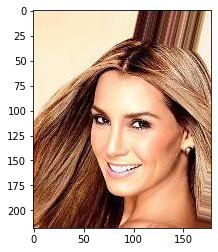

In [ ]:
# Visualize sample of image (initial)
plt.imshow(img)

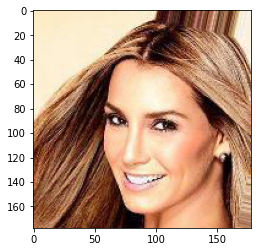

In [ ]:
# Visualize sample of image (after crop)

plt.imshow(img_crop)

In [7]:
my_list=[]
for i in range(5000):
    img=mpimg.imread(celebs["image_id"][i])
    img=img[20:198,:,:]
    my_list.append(img/255)

In [8]:
y=celebs.loc[:4999,['Male', 'Young', 'Attractive', 'Smiling', 'Heavy_Makeup',
                    'High_Cheekbones', 'Narrow_Eyes', 'Pale_Skin', 'Oval_Face', 
                    'Straight_Hair', 'Wavy_Hair', 'Bald', 'Black_Hair', 'Blond_Hair', 'Brown_Hair']]

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(np.array(my_list), y, test_size=0.20, random_state=82)

my_list=[]

In [ ]:
X_train.shape

(4000, 178, 178, 3)

In [10]:
# create test set
new_list=[]
for i in range(1000):
    img=mpimg.imread(celebs["image_id"][5000+i])
    img=img[20:198,:,:]
    new_list.append(img/255)

X_test = np.array(new_list)

new_list=[]

y_test = celebs.loc[5000:5999,['Male', 'Young', 'Attractive', 'Smiling', 'Heavy_Makeup',
                               'High_Cheekbones', 'Narrow_Eyes', 'Pale_Skin', 'Oval_Face', 
                               'Straight_Hair', 'Wavy_Hair', 'Bald', 'Black_Hair', 'Blond_Hair', 'Brown_Hair']]

In [ ]:
X_test.shape

(1000, 178, 178, 3)

In [11]:
y_test.shape


(1000, 15)

### Build Models for Binary Classification of several Facial Attributes

In [ ]:
# Create checkpoint2 directory (if not exist) to store best models

import os
try:
    os.mkdir('checkpoint2')
except:
    pass

#### Binary Classification for Attribute Male

In [ ]:
# male_model to classify binaty attrubute "male"

layer_male1 = keras.layers.Conv2D(32, 3, activation="relu")
layer_male2 = keras.layers.MaxPooling2D(2,2)
layer_male3 = keras.layers.Conv2D(64, 3, activation="relu")
layer_male4 = keras.layers.MaxPooling2D(2,2)
layer_male5 = keras.layers.Conv2D(128, 3, activation="relu")
layer_male6 = keras.layers.MaxPooling2D(2,2)
layer_male7 = keras.layers.Conv2D(256, 3, activation="relu")
layer_male8 = keras.layers.MaxPooling2D(2,2)
layer_male9 = keras.layers.Conv2D(512, 3, activation="relu")
layer_male10 = keras.layers.MaxPooling2D(2,2)
layer_male11 = keras.layers.Flatten()
layer_male12 = keras.layers.Dense(1000, activation="relu")
layer_male13 = keras.layers.Dense(256, activation="relu")
layer_male14 = keras.layers.Dense(2, activation="softmax")

male_model = keras.Sequential([keras.layers.Input(shape=(178, 178, 3)), layer_male1, layer_male2, layer_male3, layer_male4, layer_male5, 
                              layer_male6, layer_male7, layer_male8, layer_male9, layer_male10, layer_male11, layer_male12, 
                              layer_male13, layer_male14])

male_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 176, 176, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 88, 88, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 86, 86, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 41, 41, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 18, 18, 256)      

In [ ]:
# Create y_male train-validation-tests sets for classification task "Male"

y_male_train=y_train["Male"]
y_male_valid=y_valid["Male"]
y_male_test=y_test["Male"]

In [ ]:
# We specify the training configuration (optimizer, loss, metrics):
male_model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),  
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
# Call_back to store best model
file_name = 'best_model_male.h5'
checkpoint_path= os.path.join('checkpoint2',file_name)

call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_sparse_categorical_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

In [ ]:
# Fit model to training data - track through validation data
print("Fit model on training data")
history = male_model.fit(
    X_train,
    y_male_train,
    batch_size=128,
    epochs=30,
    validation_data=(X_valid, y_male_valid),
    callbacks=call_back,
    shuffle=True)

Fit model on training data
Epoch 1/30
32/32 [==============================] - 6s 168ms/step - loss: 0.8889 - sparse_categorical_accuracy: 0.5650 - val_loss: 0.6811 - val_sparse_categorical_accuracy: 0.5870

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.58700, saving model to checkpoint2/best_model_male.h5
Epoch 2/30
32/32 [==============================] - 5s 142ms/step - loss: 0.6993 - sparse_categorical_accuracy: 0.5830 - val_loss: 0.6909 - val_sparse_categorical_accuracy: 0.5400

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.58700
Epoch 3/30
32/32 [==============================] - 4s 140ms/step - loss: 0.6591 - sparse_categorical_accuracy: 0.6110 - val_loss: 0.6148 - val_sparse_categorical_accuracy: 0.6250

Epoch 00003: val_sparse_categorical_accuracy improved from 0.58700 to 0.62500, saving model to checkpoint2/best_model_male.h5
Epoch 4/30
32/32 [==============================] - 5s 143ms/step - loss: 0.5882 - sparse_categorical_accur

In [ ]:
# Final Evaluation on test data

male_model.load_weights(checkpoint_path)
print("Evaluate on test data")
results = male_model.evaluate(X_test, y_male_test, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
32/32 [==============================] - 1s 16ms/step - loss: 0.5444 - sparse_categorical_accuracy: 0.9340
test loss, test acc: [0.544408917427063, 0.9340000152587891]


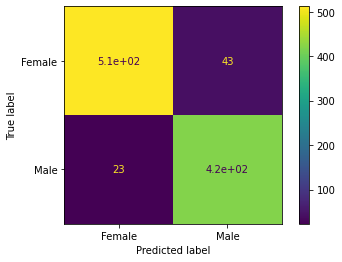

In [ ]:
pred = male_model.predict(X_test) 
y_pred = np.argmax(pred, axis = 1)
cm=confusion_matrix(y_male_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Female", "Male"])
disp.plot() 

#### Binary Classification for Attribute "Young"

In [ ]:
# young_model to classify binary attrubute "young"

layer_young1 = keras.layers.Conv2D(32, 3, activation="relu")
layer_young2 = keras.layers.MaxPooling2D(2,2)
layer_young3 = keras.layers.Conv2D(64, 3, activation="relu")
layer_youngd3 = keras.layers.Dropout(0.2)
layer_young4 = keras.layers.MaxPooling2D(2,2)
layer_young5 = keras.layers.Conv2D(128, 3, activation="relu")
layer_youngd5 = keras.layers.Dropout(0.2)
layer_young6 = keras.layers.MaxPooling2D(2,2)
layer_young7 = keras.layers.Conv2D(256, 3, activation="relu")
layer_youngd7 = keras.layers.Dropout(0.2)
layer_young8 = keras.layers.MaxPooling2D(2,2)
layer_young9 = keras.layers.Conv2D(512, 3, activation="relu")
layer_youngd9 = keras.layers.Dropout(0.2)
layer_young10 = keras.layers.MaxPooling2D(2,2)
layer_young11 = keras.layers.Flatten()
layer_young12 = keras.layers.Dense(1000, activation="relu")
layer_youngd12 = keras.layers.Dropout(0.3)
layer_young13 = keras.layers.Dense(256, activation="relu")
layer_youngd13 = keras.layers.Dropout(0.2)
layer_young14 = keras.layers.Dense(2, activation="softmax")

young_model = keras.Sequential([keras.layers.Input(shape=(178, 178, 3)), layer_young1, layer_young2, layer_young3, layer_youngd3, layer_young4, 
                              layer_young5, layer_youngd5, layer_young6, layer_young7, layer_youngd7, layer_young8, layer_young9, layer_youngd9, 
                              layer_young10, layer_young11, layer_young12, layer_youngd12, layer_young13, layer_youngd13, layer_young14])

young_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 176, 176, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 88, 88, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 86, 86, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 86, 86, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 41, 41, 128)       73856     
_________________________________________________________________
dropout_7 (Dropout)          (None, 41, 41, 128)      

In [ ]:
# Create y_young train-validation-tests sets for classification task "Young"

y_young_train=y_train["Young"]
y_young_valid=y_valid["Young"]
y_young_test=y_test["Young"]

In [ ]:
# We specify the training configuration (optimizer, loss, metrics):
young_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
# Call_back to store best model
file_name = 'best_model_young.h5'
checkpoint_path= os.path.join('checkpoint2',file_name)

call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_sparse_categorical_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

In [ ]:
# Fit model to training data - track through validation data
print("Fit model on training data")
history = young_model.fit(
    X_train,
    y_young_train,
    batch_size=64,
    epochs=30,
    validation_data=(X_valid, y_young_valid),
    callbacks=call_back,
    shuffle=True)

Fit model on training data
Epoch 1/30
63/63 [==============================] - 40s 115ms/step - loss: 0.5760 - sparse_categorical_accuracy: 0.7843 - val_loss: 0.5765 - val_sparse_categorical_accuracy: 0.7690

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.76900, saving model to checkpoint2/best_model_young.h5
Epoch 2/30
63/63 [==============================] - 6s 89ms/step - loss: 0.5155 - sparse_categorical_accuracy: 0.7860 - val_loss: 0.5260 - val_sparse_categorical_accuracy: 0.7690

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.76900
Epoch 3/30
63/63 [==============================] - 6s 89ms/step - loss: 0.5021 - sparse_categorical_accuracy: 0.7860 - val_loss: 0.5161 - val_sparse_categorical_accuracy: 0.7690

Epoch 00003: val_sparse_categorical_accuracy did not improve from 0.76900
Epoch 4/30
63/63 [==============================] - 6s 89ms/step - loss: 0.4865 - sparse_categorical_accuracy: 0.7860 - val_loss: 0.5154 - val_sparse_categoric

In [ ]:
# Final Evaluation on test data

young_model.load_weights(checkpoint_path)
print("Evaluate on test data")
results = young_model.evaluate(X_test, y_young_test, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
32/32 [==============================] - 1s 23ms/step - loss: 0.4472 - sparse_categorical_accuracy: 0.8040
test loss, test acc: [0.4471667408943176, 0.8040000200271606]


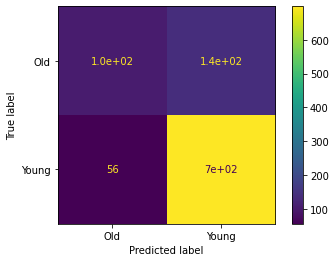

In [ ]:
pred = young_model.predict(X_test) 
y_pred = np.argmax(pred, axis = 1)
cm=confusion_matrix(y_young_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Old", "Young"])
disp.plot() 

#### Binary Classification for the Attribute "Smiling"

In [ ]:
# smile_model to classify binaty attrubute "Smiling"

layer_smile1 = keras.layers.Conv2D(32, 3, activation="relu")
layer_smile2 = keras.layers.MaxPooling2D(2,2)
layer_smile3 = keras.layers.Conv2D(64, 3, activation="relu")
layer_smiled3 = keras.layers.Dropout(0.2)
layer_smile4 = keras.layers.MaxPooling2D(2,2)
layer_smile5 = keras.layers.Conv2D(128, 3, activation="relu")
layer_smiled5 = keras.layers.Dropout(0.2)
layer_smile6 = keras.layers.MaxPooling2D(2,2)
layer_smile7 = keras.layers.Conv2D(256, 3, activation="relu")
layer_smiled7 = keras.layers.Dropout(0.2)
layer_smile8 = keras.layers.MaxPooling2D(2,2)
layer_smile9 = keras.layers.Conv2D(512, 3, activation="relu")
layer_smiled9 = keras.layers.Dropout(0.2)
layer_smile10 = keras.layers.MaxPooling2D(2,2)
layer_smile11 = keras.layers.Flatten()
layer_smile12 = keras.layers.Dense(1000, activation="relu")
layer_smiled12 = keras.layers.Dropout(0.3)
layer_smile13 = keras.layers.Dense(256, activation="relu")
layer_smiled13 = keras.layers.Dropout(0.3)
layer_smile14 = keras.layers.Dense(2, activation="softmax")

                            
smile_model = keras.Sequential([keras.layers.Input(shape=(178, 178, 3)), layer_smile1, layer_smile2, layer_smile3, layer_smiled3, layer_smile4, 
                                layer_smile5, layer_smiled5, layer_smile6, layer_smile7,layer_smiled7, layer_smile8, layer_smile9,
                                layer_smiled9, layer_smile10, layer_smile11, layer_smile12, layer_smiled12, layer_smile13, 
                                layer_smiled13, layer_smile14])

smile_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 176, 176, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 88, 88, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 86, 86, 64)        18496     
_________________________________________________________________
dropout_12 (Dropout)         (None, 86, 86, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 41, 41, 128)       73856     
_________________________________________________________________
dropout_13 (Dropout)         (None, 41, 41, 128)      

In [ ]:
# Create y_smile train-validation-tests sets for classification task "Smiling"

y_smile_train=y_train["Smiling"]
y_smile_valid=y_valid["Smiling"]
y_smile_test=y_test["Smiling"]

In [ ]:
# We specify the training configuration (optimizer, loss, metrics):
smile_model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),  
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
# Call_back to store best model
file_name = 'best_model_smile.h5'
checkpoint_path= os.path.join('checkpoint2',file_name)

call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_sparse_categorical_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

In [ ]:
# Fit model to training data - track through validation data
print("Fit model on training data")
history = smile_model.fit(
    X_train,
    y_smile_train,
    batch_size=64,
    epochs=30,
    validation_data=(X_valid, y_smile_valid),
    callbacks=call_back,
    shuffle=True)

Fit model on training data
Epoch 1/30
63/63 [==============================] - 8s 100ms/step - loss: 3.4485 - sparse_categorical_accuracy: 0.5117 - val_loss: 0.6930 - val_sparse_categorical_accuracy: 0.5080

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.50800, saving model to checkpoint2/best_model_smile.h5
Epoch 2/30
63/63 [==============================] - 6s 91ms/step - loss: 0.7227 - sparse_categorical_accuracy: 0.5245 - val_loss: 0.6928 - val_sparse_categorical_accuracy: 0.5080

Epoch 00002: val_sparse_categorical_accuracy did not improve from 0.50800
Epoch 3/30
63/63 [==============================] - 6s 91ms/step - loss: 0.7013 - sparse_categorical_accuracy: 0.5278 - val_loss: 0.6916 - val_sparse_categorical_accuracy: 0.5330

Epoch 00003: val_sparse_categorical_accuracy improved from 0.50800 to 0.53300, saving model to checkpoint2/best_model_smile.h5
Epoch 4/30
63/63 [==============================] - 6s 91ms/step - loss: 0.7082 - sparse_categorical_accura

In [ ]:
# Final Evaluation on test data
smile_model.load_weights(checkpoint_path)

print("Evaluate on test data")
results = smile_model.evaluate(X_test, y_smile_test, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
32/32 [==============================] - 1s 16ms/step - loss: 0.2569 - sparse_categorical_accuracy: 0.8870
test loss, test acc: [0.2569214403629303, 0.8870000243186951]


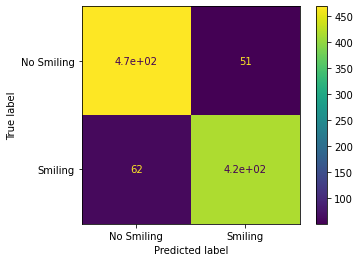

In [ ]:
pred = smile_model.predict(X_test) 
y_pred = np.argmax(pred, axis = 1)
cm=confusion_matrix(y_smile_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Smiling", "Smiling"])
disp.plot()

#### Binary Classification for Attribute "Attractive"

In [ ]:
# attr_model to classify binaty attribute "Attractive"

layer_attr1 = keras.layers.Conv2D(32, 3, activation="relu")
layer_attr2 = keras.layers.MaxPooling2D(2,2)
layer_attr3 = keras.layers.Conv2D(64, 3, activation="relu")
layer_attrd3 = keras.layers.Dropout(0.2)
layer_attr4 = keras.layers.MaxPooling2D(2,2)
layer_attr5 = keras.layers.Conv2D(128, 3, activation="relu")
layer_attrd5 = keras.layers.Dropout(0.2)
layer_attr6 = keras.layers.MaxPooling2D(2,2)
layer_attr7 = keras.layers.Conv2D(256, 3, activation="relu")
layer_attrd7 = keras.layers.Dropout(0.2)
layer_attr8 = keras.layers.MaxPooling2D(2,2)
layer_attr9 = keras.layers.Conv2D(512, 3, activation="relu")
layer_attrd9 = keras.layers.Dropout(0.2)
layer_attr10 = keras.layers.MaxPooling2D(2,2)
layer_attr11 = keras.layers.Flatten()
layer_attr12 = keras.layers.Dense(1000, activation="relu")
layer_attrd12 = keras.layers.Dropout(0.3)
layer_attr13 = keras.layers.Dense(256, activation="relu")
layer_attrd13 = keras.layers.Dropout(0.3)
layer_attr14 = keras.layers.Dense(2, activation="softmax")

                            
attr_model = keras.Sequential([keras.layers.Input(shape=(178, 178, 3)), layer_attr1, layer_attr2, layer_attr3, layer_attrd3, layer_attr4, 
                                layer_attr5, layer_attrd5, layer_attr6, layer_attr7,layer_attrd7, layer_attr8, layer_attr9,
                                layer_attrd9, layer_attr10, layer_attr11, layer_attr12, layer_attrd12, layer_attr13, 
                                layer_attrd13, layer_attr14])

attr_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 176, 176, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 88, 88, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 86, 86, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 86, 86, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 41, 41, 128)       73856     
_________________________________________________________________
dropout_7 (Dropout)          (None, 41, 41, 128)      

In [ ]:
# Create y_attr train-validation-tests sets for classification task "Attractive"

y_attr_train=y_train["Attractive"]
y_attr_valid=y_valid["Attractive"]
y_attr_test=y_test["Attractive"]

In [ ]:
# We specify the training configuration (optimizer, loss, metrics):
attr_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
# Call_back to store best model
file_name = 'best_model_attr.h5'
checkpoint_path= os.path.join('checkpoint2',file_name)

call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_sparse_categorical_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

In [ ]:
# Fit model to training data - track through validation data
print("Fit model on training data")
history = attr_model.fit(
    X_train,
    y_attr_train,
    batch_size=64,
    epochs=30,
    validation_data=(X_valid, y_attr_valid),
    callbacks=call_back,
    shuffle=True)

Fit model on training data
Epoch 1/30
63/63 [==============================] - 40s 118ms/step - loss: 0.7069 - sparse_categorical_accuracy: 0.5160 - val_loss: 0.6826 - val_sparse_categorical_accuracy: 0.5150

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.51500, saving model to checkpoint2/best_model_attr.h5
Epoch 2/30
63/63 [==============================] - 6s 89ms/step - loss: 0.6507 - sparse_categorical_accuracy: 0.6292 - val_loss: 0.6433 - val_sparse_categorical_accuracy: 0.6310

Epoch 00002: val_sparse_categorical_accuracy improved from 0.51500 to 0.63100, saving model to checkpoint2/best_model_attr.h5
Epoch 3/30
63/63 [==============================] - 6s 89ms/step - loss: 0.6047 - sparse_categorical_accuracy: 0.6795 - val_loss: 0.6125 - val_sparse_categorical_accuracy: 0.6790

Epoch 00003: val_sparse_categorical_accuracy improved from 0.63100 to 0.67900, saving model to checkpoint2/best_model_attr.h5
Epoch 4/30
63/63 [==============================] - 6s 9

In [ ]:
# Final Evaluation on test data
attr_model.load_weights(checkpoint_path)

print("Evaluate on test data")
results = attr_model.evaluate(X_test, y_attr_test, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
32/32 [==============================] - 1s 28ms/step - loss: 0.5107 - sparse_categorical_accuracy: 0.7530
test loss, test acc: [0.5106688737869263, 0.753000020980835]


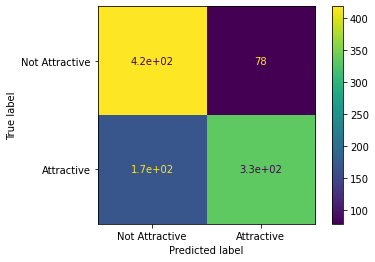

In [ ]:
pred = attr_model.predict(X_test) 
y_pred = np.argmax(pred, axis = 1)
cm=confusion_matrix(y_attr_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Attractive", "Attractive"])
disp.plot()

#### Classification for attribute "Heavy_Makeup"

In [12]:
# hm_model to classify binaty attribute "Heavy_Makeup"

layer_hm1 = keras.layers.Conv2D(32, 3, activation="relu")
layer_hm2 = keras.layers.MaxPooling2D(2,2)
layer_hm3 = keras.layers.Conv2D(64, 3, activation="relu")
layer_hmd3 = keras.layers.Dropout(0.2)
layer_hm4 = keras.layers.MaxPooling2D(2,2)
layer_hm5 = keras.layers.Conv2D(128, 3, activation="relu")
layer_hmd5 = keras.layers.Dropout(0.2)
layer_hm6 = keras.layers.MaxPooling2D(2,2)
layer_hm7 = keras.layers.Conv2D(256, 3, activation="relu")
layer_hmd7 = keras.layers.Dropout(0.2)
layer_hm8 = keras.layers.MaxPooling2D(2,2)
layer_hm9 = keras.layers.Conv2D(512, 3, activation="relu")
layer_hmd9 = keras.layers.Dropout(0.2)
layer_hm10 = keras.layers.MaxPooling2D(2,2)
layer_hm11 = keras.layers.Flatten()
layer_hm12 = keras.layers.Dense(1000, activation="relu")
layer_hmd12 = keras.layers.Dropout(0.3)
layer_hm13 = keras.layers.Dense(256, activation="relu")
layer_hmd13 = keras.layers.Dropout(0.3)
layer_hm14 = keras.layers.Dense(2, activation="softmax")

inner_model = keras.Sequential([keras.layers.Input(shape=(178, 178, 3)), layer_hm1, layer_hm2, layer_hm3, layer_hmd3, layer_hm4, 
                                layer_hm5, layer_hmd5, layer_hm6, layer_hm7,layer_hmd7, layer_hm8, layer_hm9,
                                layer_hmd9, layer_hm10, layer_hm11, layer_hm12])
                            
hm_model = keras.Sequential([keras.layers.Input(shape=(178, 178, 3)), inner_model, layer_hmd12, layer_hm13, 
                                layer_hmd13, layer_hm14])

hm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 1000)              6177576   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               256256    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
Total params: 6,434,346
Trainable params: 6,434,346
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Create y_hm train-validation-tests sets for classification task "Heavy_Makeup"

y_hm_train=y_train["Heavy_Makeup"]
y_hm_valid=y_valid["Heavy_Makeup"]
y_hm_test=y_test["Heavy_Makeup"]

In [14]:
# We specify the training configuration (optimizer, loss, metrics):
hm_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),  
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [15]:
# Call_back to store best model
file_name = 'best_model_hm.h5'
checkpoint_path= os.path.join('checkpoint2',file_name)

call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_sparse_categorical_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

In [16]:
# Fit model to training data - track through validation data
print("Fit model on training data")
history = hm_model.fit(
    X_train,
    y_hm_train,
    batch_size=64,
    epochs=30,
    validation_data=(X_valid, y_hm_valid),
    callbacks=call_back,
    shuffle=True)

Fit model on training data
Epoch 1/30
63/63 [==============================] - 40s 122ms/step - loss: 0.6439 - sparse_categorical_accuracy: 0.6227 - val_loss: 0.6350 - val_sparse_categorical_accuracy: 0.6930

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.69300, saving model to checkpoint2/best_model_hm.h5
Epoch 2/30
63/63 [==============================] - 6s 93ms/step - loss: 0.5624 - sparse_categorical_accuracy: 0.7030 - val_loss: 0.5603 - val_sparse_categorical_accuracy: 0.7380

Epoch 00002: val_sparse_categorical_accuracy improved from 0.69300 to 0.73800, saving model to checkpoint2/best_model_hm.h5
Epoch 3/30
63/63 [==============================] - 6s 94ms/step - loss: 0.5134 - sparse_categorical_accuracy: 0.7442 - val_loss: 0.5161 - val_sparse_categorical_accuracy: 0.7810

Epoch 00003: val_sparse_categorical_accuracy improved from 0.73800 to 0.78100, saving model to checkpoint2/best_model_hm.h5
Epoch 4/30
63/63 [==============================] - 6s 95ms/st

In [17]:
hm_model.load_weights(checkpoint_path)

inner_model.trainable = False

In [18]:
# Final Evaluation on test data

print("Evaluate on test data")
results = hm_model.evaluate(X_test, y_hm_test, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
32/32 [==============================] - 1s 24ms/step - loss: 0.2750 - sparse_categorical_accuracy: 0.8850
test loss, test acc: [0.2749992907047272, 0.8849999904632568]


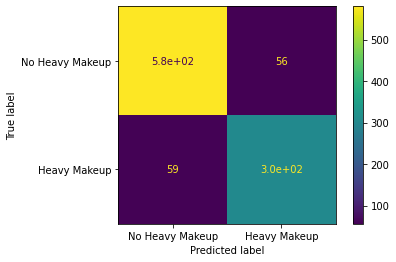

In [19]:
pred = hm_model.predict(X_test) 
y_pred = np.argmax(pred, axis = 1)
cm=confusion_matrix(y_hm_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Heavy Makeup", "Heavy Makeup"])
disp.plot()

In [ ]:
# "Freeze" model layers to by used for transfer learning
#layer_hm1.trainable = False
#layer_hm2.trainable = False
#layer_hm3.trainable = False
#layer_hmd3.trainable = False
#layer_hm4.trainable = False
#layer_hm5.trainable = False
#layer_hmd5.trainable = False
#layer_hm6.trainable = False
#layer_hm7.trainable = False
#layer_hmd7.trainable = False
#layer_hm8.trainable = False
#layer_hm9.trainable = False
#layer_hmd9.trainable = False
#layer_hm10.trainable = False
#layer_hm11.trainable = False
#layer_hm12.trainable = False
#layer_hmd12.trainable = False

#model.trainable = False  # Freeze the outer model
#assert inner_model.trainable == False  # All layers in `model` are now frozen
#assert inner_model.layers[0].trainable == False  # `trainable` is propagated recursively


### Transfer Learning 

In [20]:
# Create y_ps train-validation-tests sets for classification task for "High Cheekbones" Attribute
# transfer learning utilizing model trained for attribute "Heavy_Makeup"

y_hc_train=y_train["High_Cheekbones"]
y_hc_valid=y_valid["High_Cheekbones"]
y_hc_test=y_test["High_Cheekbones"]

In [21]:
# Build a model from the pre-trained layers of "hm_model" (inner model) and adding 2 Dense & 1 Prediction Layer

inputs = keras.Input(shape=(178, 178, 3))
x = inner_model(inputs, training=False)
x = keras.layers.Dense(1000, activation="relu")(x)
x = keras.layers.Dense(512, activation="relu")(x)
x = keras.layers.Dense(64, activation="relu")(x)
predict = keras.layers.Dense(2, activation="softmax")(x)
tl_hc_model = keras.Model(inputs=inputs, outputs=predict)

tl_hc_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 178, 178, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 1000)              6177576   
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_4 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 130       
Total params: 7,724,050
Trainable params: 1,546,474
Non-trainable params: 6,177,576
___________________________________________

In [22]:
inner_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 176, 176, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 88, 88, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 86, 86, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 86, 86, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 128)       73856     
_________________________________________________________________
dropout_1 (Dropout)          (None, 41, 41, 128)       0

In [23]:
# We specify the training configuration (optimizer, loss, metrics):
tl_hc_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [24]:
# Call_back to store best model
file_name = 'best_model_tl_hc.h5'
checkpoint_path= os.path.join('checkpoint2',file_name)

call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_sparse_categorical_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

In [25]:
# Fit model to training data - track through validation data
print("Fit model on training data")
history = tl_hc_model.fit(
    X_train,
    y_hc_train,
    batch_size=64,
    epochs=50,
    validation_data=(X_valid, y_hc_valid),
    callbacks=call_back,
    shuffle=True)

Fit model on training data
Epoch 1/50
63/63 [==============================] - 4s 49ms/step - loss: 0.6326 - sparse_categorical_accuracy: 0.6538 - val_loss: 0.6274 - val_sparse_categorical_accuracy: 0.6610

Epoch 00001: val_sparse_categorical_accuracy improved from -inf to 0.66100, saving model to checkpoint2/best_model_tl_hc.h5
Epoch 2/50
63/63 [==============================] - 2s 38ms/step - loss: 0.6103 - sparse_categorical_accuracy: 0.6765 - val_loss: 0.6149 - val_sparse_categorical_accuracy: 0.6760

Epoch 00002: val_sparse_categorical_accuracy improved from 0.66100 to 0.67600, saving model to checkpoint2/best_model_tl_hc.h5
Epoch 3/50
63/63 [==============================] - 2s 38ms/step - loss: 0.6038 - sparse_categorical_accuracy: 0.6827 - val_loss: 0.5866 - val_sparse_categorical_accuracy: 0.6920

Epoch 00003: val_sparse_categorical_accuracy improved from 0.67600 to 0.69200, saving model to checkpoint2/best_model_tl_hc.h5
Epoch 4/50
63/63 [==============================] - 2s 

In [26]:
# Final Evaluation on test data
tl_hc_model.load_weights(checkpoint_path)

print("Evaluate on test data")
results = tl_hc_model.evaluate(X_test, y_hc_test, batch_size=32)
print("test loss, test acc:", results)

Evaluate on test data
32/32 [==============================] - 1s 19ms/step - loss: 0.4923 - sparse_categorical_accuracy: 0.7650
test loss, test acc: [0.4922548830509186, 0.7649999856948853]


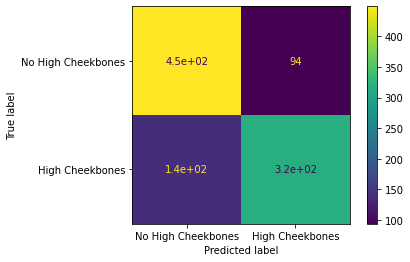

In [27]:
pred = tl_hc_model.predict(X_test) 
y_pred = np.argmax(pred, axis = 1)
cm=confusion_matrix(y_hc_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No High Cheekbones", "High Cheekbones"])
disp.plot()

### Multi-task model (multiple outputs)

In [12]:
# Multi-output model to predict 3 attributes "hair"-related: "Blond Hair", "Wavy Hair", "Black Hair"

# Create multiple y train-valid-test sets 
y_bh_train=y_train["Blond_Hair"]
y_bh_valid=y_valid["Blond_Hair"]
y_bh_test=y_test["Blond_Hair"]

y_wh_train=y_train["Wavy_Hair"]
y_wh_valid=y_valid["Wavy_Hair"]
y_wh_test=y_test["Wavy_Hair"]

y_b_train=y_train["Black_Hair"]
y_b_valid=y_valid["Black_Hair"]
y_b_test=y_test["Black_Hair"]

In [21]:
# Develop the multi-task model (1 input, several common layers, 3 x 2 separate Dense layers & 3 outputs)

inputs = keras.Input(shape=(178, 178, 3))

Conv1 = keras.layers.Conv2D(32, 3, activation="relu")
x = Conv1(inputs)
x = layers.MaxPooling2D(2,2)(x)
x = layers.Conv2D(64, 3, activation="relu")(x)
x = layers.MaxPooling2D(2,2)(x)
x = layers.Conv2D(128, 3, activation="relu")(x)
x = layers.MaxPooling2D(2,2)(x)
x = layers.Conv2D(256, 3, activation="relu")(x)
x = layers.MaxPooling2D(2,2)(x)
x = layers.Flatten()(x)
x = layers.Dense(1000, activation="relu")(x)

dense_attr11 = layers.Dense(512, activation="relu")(x)
dense_attr21 = layers.Dense(512, activation="relu")(x)
dense_attr31 = layers.Dense(512, activation="relu")(x)

dense_attr12 = layers.Dense(128, activation="relu")(dense_attr11)
dense_attr22 = layers.Dense(128, activation="relu")(dense_attr21)
dense_attr32 = layers.Dense(128, activation="relu")(dense_attr31)

predict_attr1 = keras.layers.Dense(2, activation="softmax", name="blond")(dense_attr12)
predict_attr2 = keras.layers.Dense(2, activation="softmax", name="wavy")(dense_attr22)
predict_attr3 = keras.layers.Dense(2, activation="softmax", name="black")(dense_attr32)


In [22]:
multitask_model = keras.Model(inputs=inputs, outputs=[predict_attr1,predict_attr2,predict_attr3], name="multitask_model")

multitask_model.summary()

Model: "multitask_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 178, 178, 3) 0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 176, 176, 32) 896         input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 88, 88, 32)   0           conv2d_4[0][0]                   
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 86, 86, 64)   18496       max_pooling2d_4[0][0]            
____________________________________________________________________________________

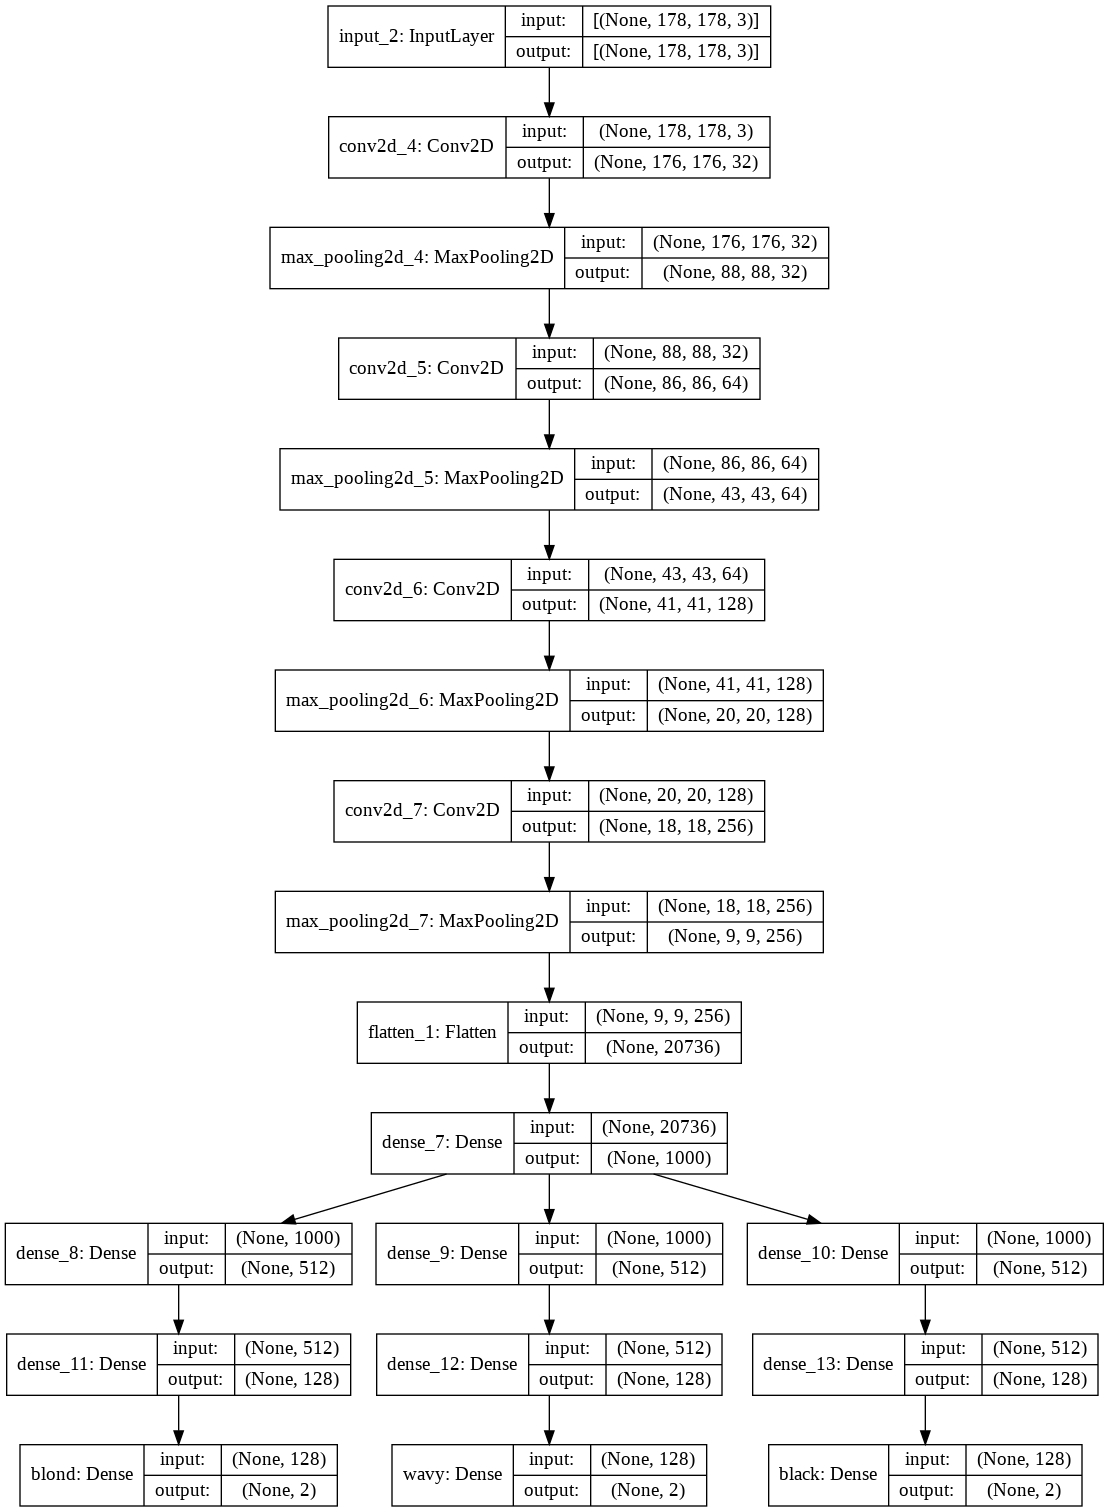

In [23]:
#Visualize the multitask model structure

keras.utils.plot_model(multitask_model, "facial_attributes_multitask_model_with_shape_info.png", show_shapes=True)

In [26]:
# Compile the model

multitask_model.compile(
    optimizer=keras.optimizers.Adam(0.0001),
    loss={"blond": keras.losses.SparseCategoricalCrossentropy(),
        "wavy": keras.losses.SparseCategoricalCrossentropy(),
        "black": keras.losses.SparseCategoricalCrossentropy()},
    loss_weights={"blond": 1, "wavy": 1, "black": 1},
    metrics={"blond":[keras.metrics.SparseCategoricalAccuracy()],"wavy":[keras.metrics.SparseCategoricalAccuracy()], "black":[keras.metrics.SparseCategoricalAccuracy()]}) 


In [24]:
# Call_back to store best model (minimun loss)
file_name = 'best_multitask_model.h5'
checkpoint_path= os.path.join('checkpoint2',file_name)

call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_loss', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='min')

In [27]:
# Fit model to training data - track through validation data
print("Fit model on training data")
history = multitask_model.fit(
    X_train,
    {"blond": y_bh_train, "wavy": y_wh_train, "black": y_b_train},
    batch_size=64,
    epochs=30,
    validation_data=(X_valid, {"blond": y_bh_valid, "wavy": y_wh_valid, "black": y_b_valid}),
    callbacks=call_back,
    shuffle=True)

Fit model on training data
Epoch 1/30
63/63 [==============================] - 7s 97ms/step - loss: 1.4915 - blond_loss: 0.3615 - wavy_loss: 0.6121 - black_loss: 0.5180 - blond_sparse_categorical_accuracy: 0.8568 - wavy_sparse_categorical_accuracy: 0.6850 - black_sparse_categorical_accuracy: 0.7505 - val_loss: 1.3093 - val_blond_loss: 0.3306 - val_wavy_loss: 0.5588 - val_black_loss: 0.4198 - val_blond_sparse_categorical_accuracy: 0.8540 - val_wavy_sparse_categorical_accuracy: 0.7200 - val_black_sparse_categorical_accuracy: 0.7940

Epoch 00001: val_loss improved from inf to 1.30926, saving model to checkpoint2/best_multitask_model.h5
Epoch 2/30
63/63 [==============================] - 5s 86ms/step - loss: 1.1860 - blond_loss: 0.2296 - wavy_loss: 0.5589 - black_loss: 0.3975 - blond_sparse_categorical_accuracy: 0.9053 - wavy_sparse_categorical_accuracy: 0.7135 - black_sparse_categorical_accuracy: 0.8077 - val_loss: 1.1587 - val_blond_loss: 0.2453 - val_wavy_loss: 0.5413 - val_black_loss: 

In [28]:
# Final Evaluation on test data
multitask_model.load_weights(checkpoint_path)

print("Evaluate on test data")
results = multitask_model.evaluate(X_test,{"blond":y_bh_test, "wavy":y_wh_test, "black": y_b_test}, batch_size=32)

Evaluate on test data
32/32 [==============================] - 1s 35ms/step - loss: 0.9354 - blond_loss: 0.1457 - wavy_loss: 0.4918 - black_loss: 0.2980 - blond_sparse_categorical_accuracy: 0.9460 - wavy_sparse_categorical_accuracy: 0.7570 - black_sparse_categorical_accuracy: 0.8560
